In [64]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import Imputer

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn import metrics
from sklearn.metrics import roc_curve,roc_auc_score

from sklearn import svm

from sklearn import model_selection

from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

In [65]:
data=pd.read_csv('vehicle.csv')
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [67]:
#We see that many columns has null values in it. So we need to deal with them.

In [68]:
data.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        845.000000     846.000000  
mean         188.919527     195.632388  
std            6.155809       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

### DATA PREPROCESSING

#### Univariant Analysis 

In [69]:
#Replacing null values in all columns with mean/median

In [70]:
data['circularity'].isnull().sum()

data['circularity'].fillna(data['circularity'].mean(),inplace=True)

In [71]:
data['distance_circularity'].isnull().sum()

data['distance_circularity'].fillna(data['distance_circularity'].mean(),inplace=True)

In [72]:
data['radius_ratio'].isnull().sum()

data['radius_ratio'].fillna(data['radius_ratio'].mean(),inplace=True)

In [73]:
data['pr.axis_aspect_ratio'].isnull().sum()

data['pr.axis_aspect_ratio'].fillna(data['pr.axis_aspect_ratio'].mean(),inplace=True)

In [74]:
data['scatter_ratio'].isnull().sum()

data['scatter_ratio'].fillna(data['scatter_ratio'].mean(),inplace=True)

In [75]:
data['elongatedness'].isnull().sum()

data['elongatedness'].fillna(data['elongatedness'].mean(),inplace=True)

In [76]:
data['pr.axis_rectangularity'].isnull().sum()

data['pr.axis_rectangularity'].fillna(data['pr.axis_rectangularity'].mean(),inplace=True)

In [77]:
data['scaled_variance'].isnull().sum()

data['scaled_variance'].fillna(data['scaled_variance'].mean(),inplace=True)

In [78]:
data['scaled_variance.1'].isnull().sum()

data['scaled_variance.1'].fillna(data['scaled_variance.1'].median(),inplace=True)

In [79]:
data['scaled_radius_of_gyration'].isnull().sum()

data['scaled_radius_of_gyration'].fillna(data['scaled_radius_of_gyration'].mean(),inplace=True)

In [80]:
data['scaled_radius_of_gyration.1'].isnull().sum()

data['scaled_radius_of_gyration.1'].fillna(data['scaled_radius_of_gyration.1'].mean(),inplace=True)

In [81]:
data['skewness_about'].isnull().sum()

data['skewness_about'].fillna(data['skewness_about'].mean(),inplace=True)

In [82]:
data['skewness_about.1'].isnull().sum()

data['skewness_about.1'].fillna(data['skewness_about.1'].mean(),inplace=True)

In [83]:
data['skewness_about.2'].isnull().sum()

data['skewness_about.2'].fillna(data['skewness_about.2'].mean(),inplace=True)

In [84]:
data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

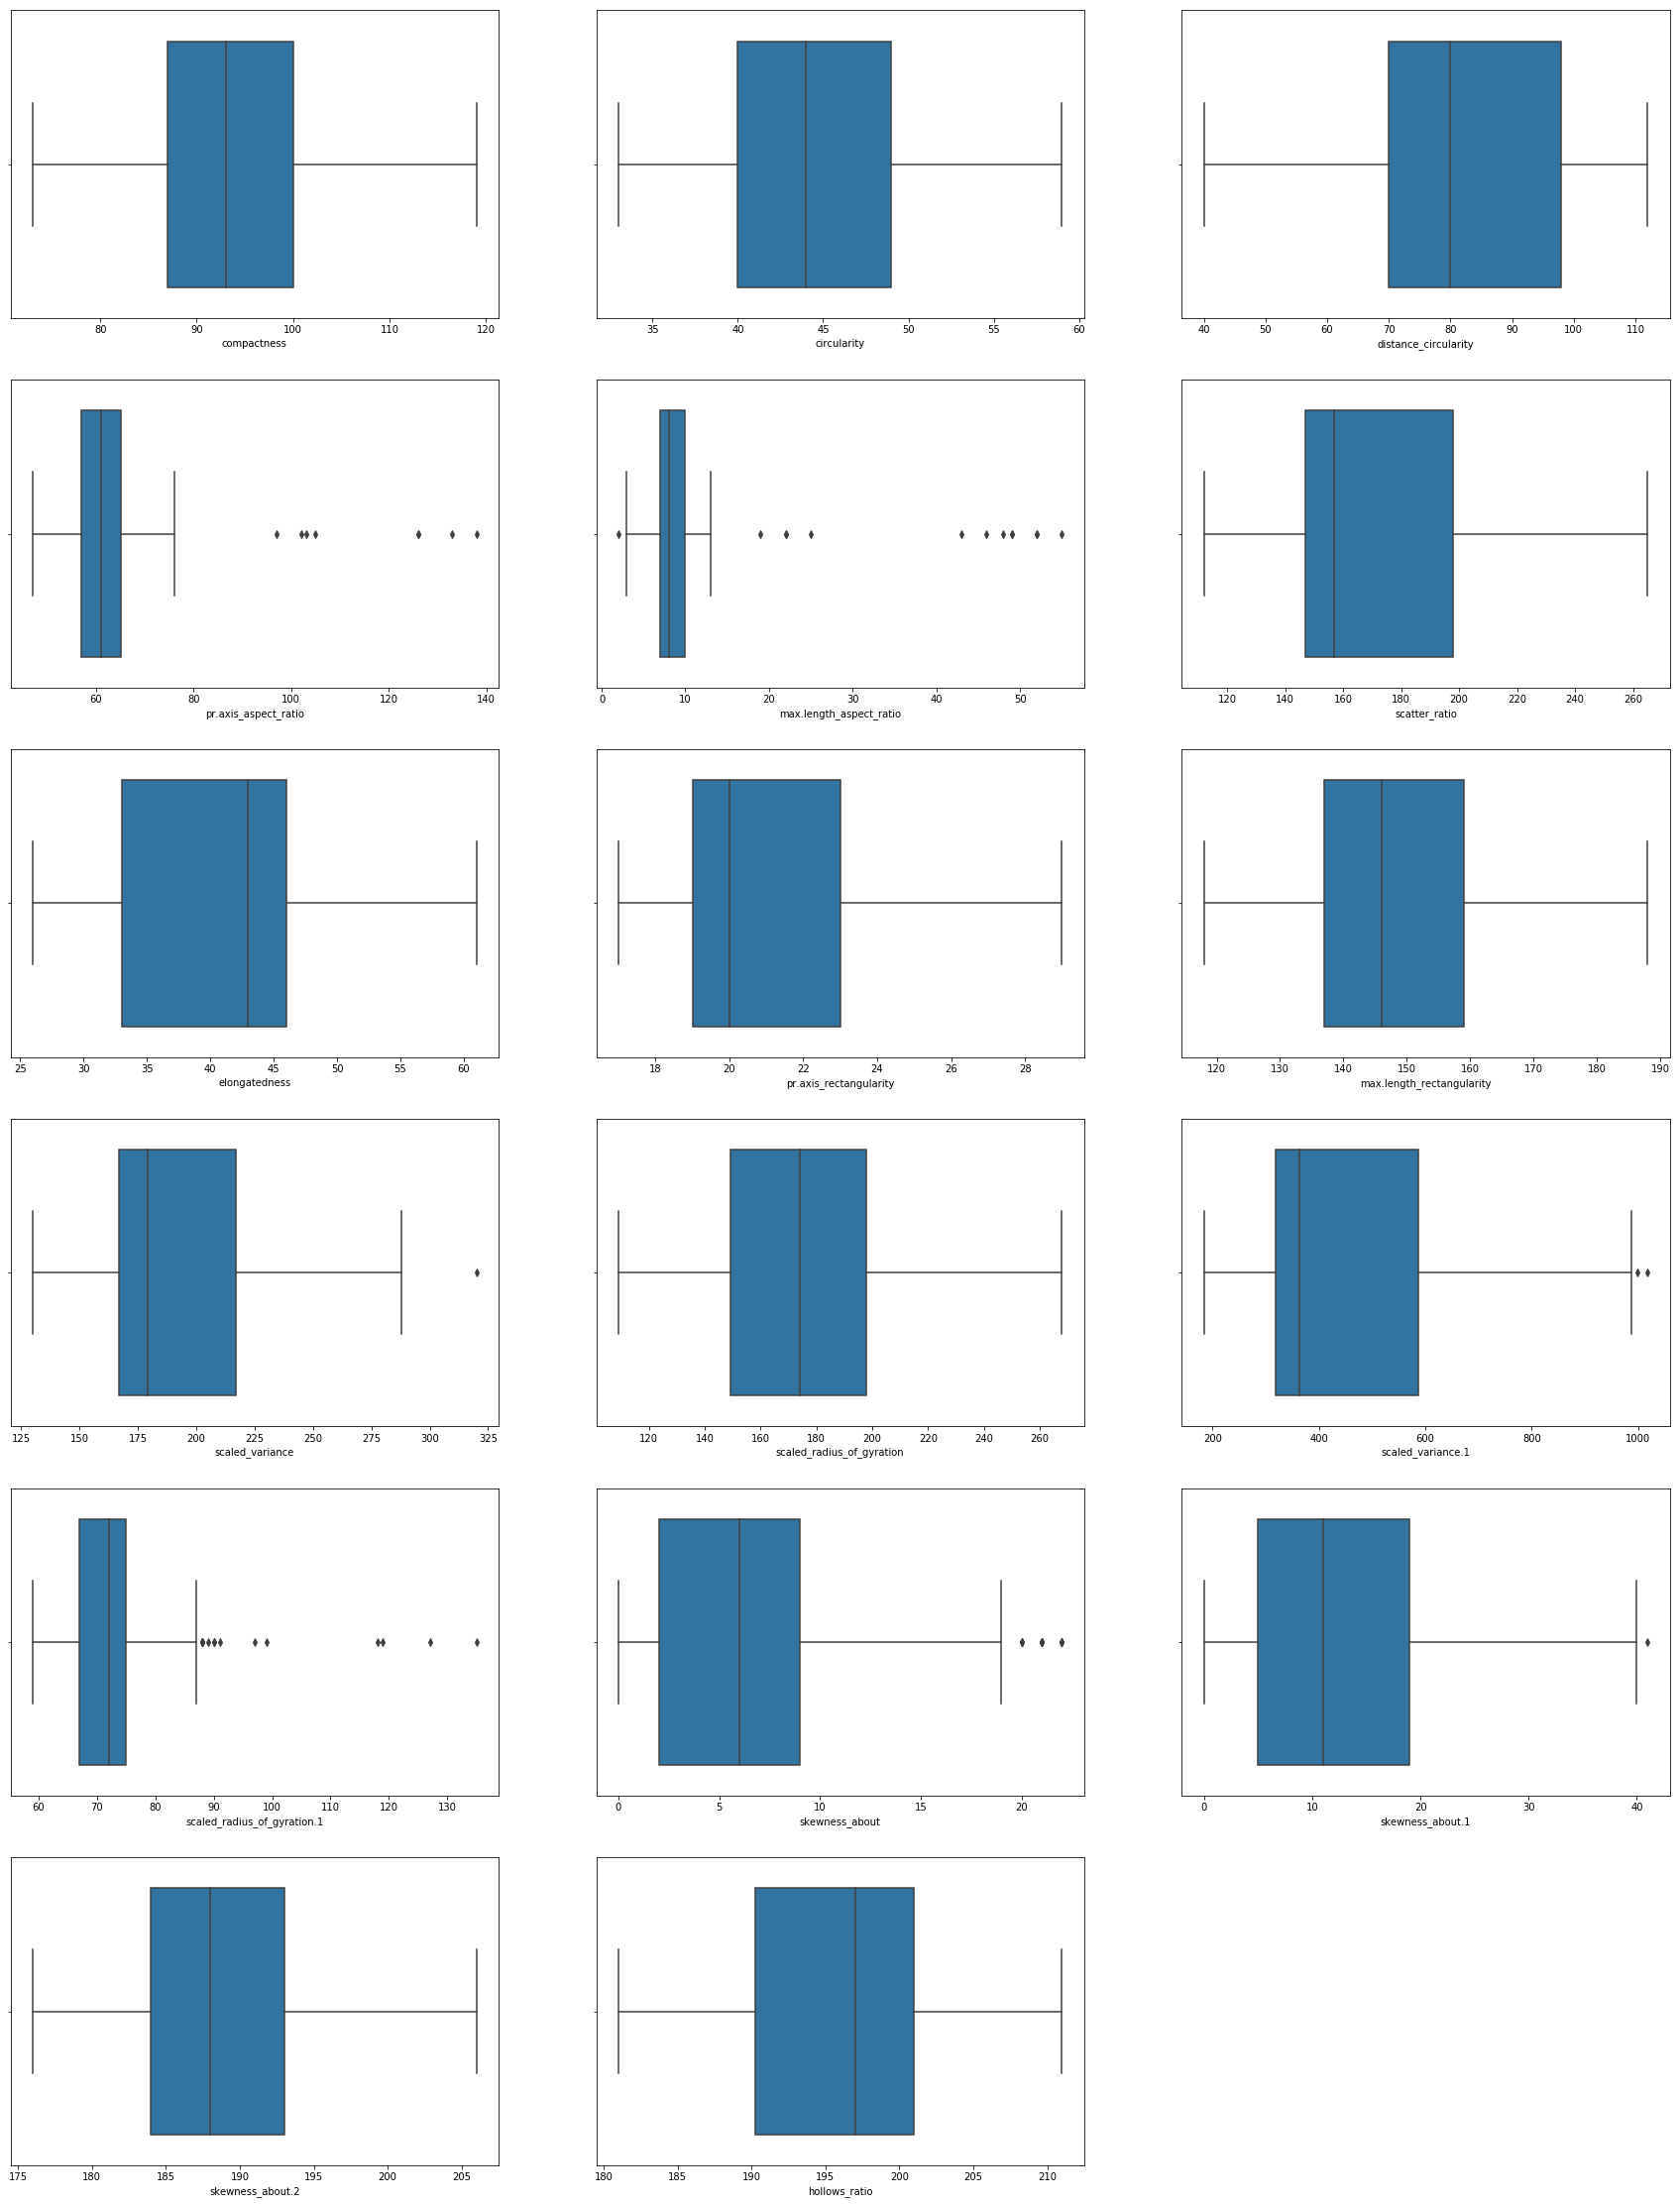

In [85]:
plt.figure(figsize=(30,40))
plt.subplot(6,3,1)
sns.boxplot(data['compactness'])
plt.subplot(6,3,2)
sns.boxplot(data['circularity'])
plt.subplot(6,3,3)
sns.boxplot(data['distance_circularity'])
plt.subplot(6,3,4)
sns.boxplot(data['pr.axis_aspect_ratio'])
plt.subplot(6,3,5)
sns.boxplot(data['max.length_aspect_ratio'])
plt.subplot(6,3,6)
sns.boxplot(data['scatter_ratio'])
plt.subplot(6,3,7)
sns.boxplot(data['elongatedness'])
plt.subplot(6,3,8)
sns.boxplot(data['pr.axis_rectangularity'])
plt.subplot(6,3,9)
sns.boxplot(data['max.length_rectangularity'])
plt.subplot(6,3,10)
sns.boxplot(data['scaled_variance'])
plt.subplot(6,3,11)
sns.boxplot(data['scaled_radius_of_gyration'])
plt.subplot(6,3,12)
sns.boxplot(data['scaled_variance.1'])
plt.subplot(6,3,13)
sns.boxplot(data['scaled_radius_of_gyration.1'])
plt.subplot(6,3,14)
sns.boxplot(data['skewness_about'])
plt.subplot(6,3,15)
sns.boxplot(data['skewness_about.1'])
plt.subplot(6,3,16)
sns.boxplot(data['skewness_about.2'])
plt.subplot(6,3,17)
sns.boxplot(data['hollows_ratio'])

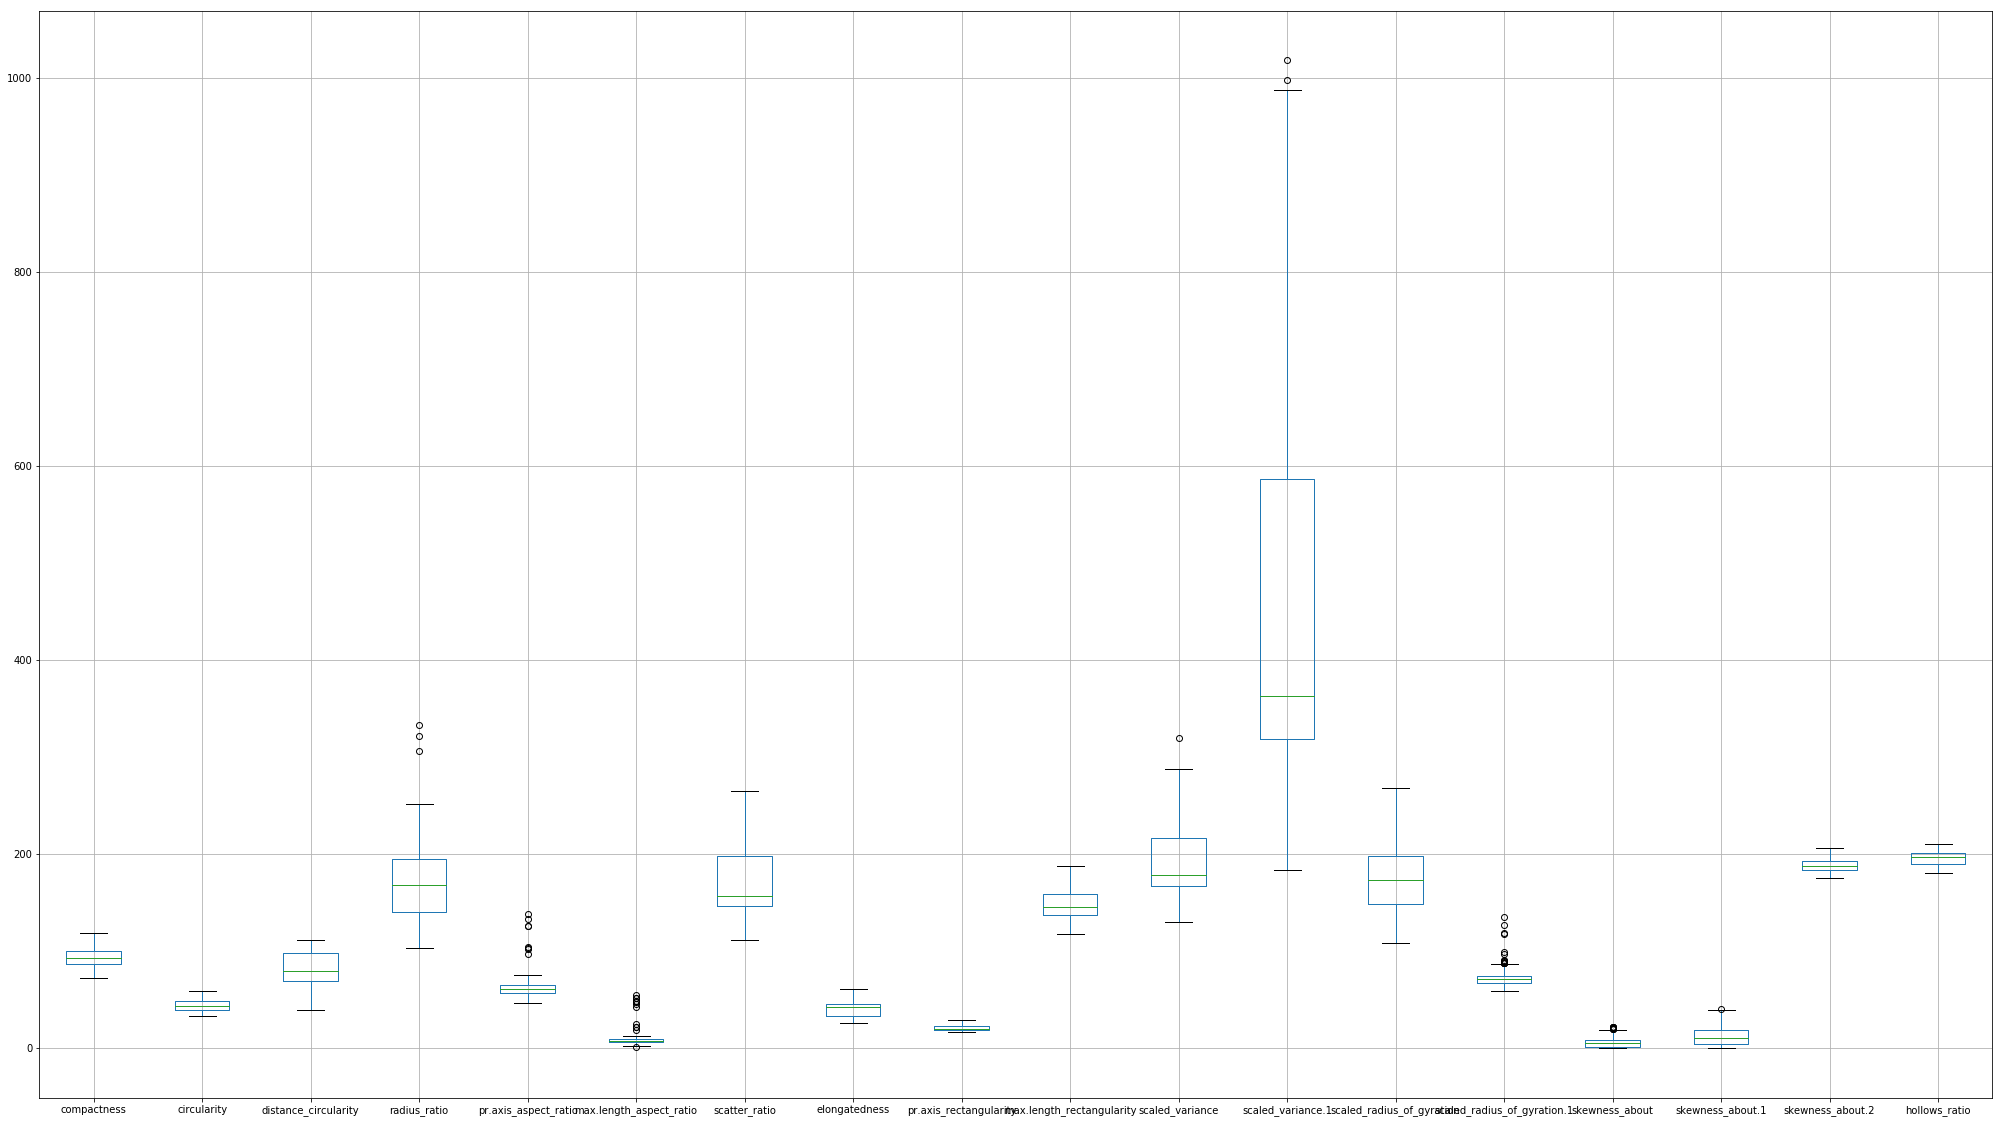

In [86]:
data.boxplot(figsize=(35,20))

In [87]:
#We see that the columns pr.axis_aspect_ratio,max.length_aspect_ratio,scaled_radius_of_gyration.1,skewness_about,radius_ratio are largely affected by the outliers.

In [88]:
pd.crosstab(data['pr.axis_aspect_ratio'],data['class'])

class                 bus  car  van
pr.axis_aspect_ratio               
47.00000                2    0    0
48.00000                1    0    3
49.00000                1    0    2
50.00000                3    1    1
51.00000                7    1    3
52.00000                3    2    9
53.00000                8   13    6
54.00000               12   16   10
55.00000                7   19   11
56.00000               13   28   16
57.00000                7   29    8
58.00000                4   22   17
59.00000                6   43   15
60.00000                5   33    8
61.00000                8   26    8
61.67891                1    1    0
62.00000                6   42   10
63.00000                4   28   13
64.00000               17   30   22
65.00000               13   20    5
66.00000               10   17   10
67.00000                7   16    5
68.00000               12   15    7
69.00000               13   10    2
70.00000               10    7    1
71.00000               10    5    0
72.00000                7    2    1
73.00000                6    1    0
74.00000                7    2    0
75.00000                5    0    0
76.00000                1    0    0
97.00000                0    0    1
102.00000               0    0    1
103.00000               1    0    0
105.00000               0    0    1
126.00000               1    0    1
133.00000               0    0    1
138.00000               0    0    1

In [89]:
#We see that from 76 it follows same pattern,

data['pr.axis_aspect_ratio']=np.where(data['pr.axis_aspect_ratio']>76,76,data['pr.axis_aspect_ratio'])

In [90]:
pd.crosstab(data['max.length_aspect_ratio'],data['class'])

class                    bus  car  van
max.length_aspect_ratio               
2                          0    0    1
3                          0    2    2
4                          7    9    2
5                         26   15   10
6                         78   35   19
7                         80   62   26
8                         22   58   33
9                          0   60   34
10                         0   80   32
11                         0   78   30
12                         0   27    3
13                         0    3    0
19                         1    0    0
22                         2    0    0
25                         0    0    1
43                         0    0    1
46                         0    0    1
48                         0    0    1
49                         0    0    2
52                         2    0    0
55                         0    0    1

In [91]:
#We see that from 19 it follows same pattern,

data['max.length_aspect_ratio']=np.where(data['max.length_aspect_ratio']>19,19,data['max.length_aspect_ratio'])

In [92]:
pd.crosstab(data['scaled_radius_of_gyration.1'],data['class'])

class                        bus  car  van
scaled_radius_of_gyration.1               
59.000000                      0    1    0
60.000000                      0    2    0
61.000000                      0    9    2
62.000000                      0   12    6
63.000000                      0   16    8
64.000000                      0   25   13
65.000000                      3   20    8
66.000000                      4   28    8
67.000000                      5   35   13
68.000000                      7   27    5
69.000000                     15   20    9
70.000000                      9   34    9
71.000000                     13   43   12
72.000000                     16   45   14
72.447743                      1    3    0
73.000000                      8   27   11
74.000000                     12   29   12
75.000000                     11   11   16
76.000000                      7    8   10
77.000000                      8    5    7
78.000000                      7    2    8
79.000000                      5    3    3
80.000000                     11    4    3
81.000000                     14    3    2
82.000000                     11    4    2
83.000000                      9    4    0
84.000000                      5    1    1
85.000000                     19    1    4
86.000000                      6    3    3
87.000000                      6    4    1
88.000000                      4    0    1
89.000000                      0    0    1
90.000000                      0    0    2
91.000000                      0    0    1
97.000000                      0    0    1
99.000000                      0    0    1
118.000000                     0    0    1
119.000000                     1    0    0
127.000000                     1    0    0
135.000000                     0    0    1

In [93]:
#We see that from 89 it follows same pattern,

data['scaled_radius_of_gyration.1']=np.where(data['scaled_radius_of_gyration.1']>89,89,data['scaled_radius_of_gyration.1'])

In [94]:
pd.crosstab(data['skewness_about'],data['class'])

class           bus  car  van
skewness_about               
0.000000         19   44   14
1.000000         22   38   21
2.000000         19   29   15
3.000000         17   26   13
4.000000         28   25   17
5.000000         22   35   14
6.000000         25   27   13
6.364286          4    2    0
7.000000         18   22   20
8.000000         15   19   13
9.000000         14   22   10
10.000000         6   21    9
11.000000         4   20    7
12.000000         2   18   10
13.000000         2   18    6
14.000000         0   14    4
15.000000         0   15    4
16.000000         0   10    1
17.000000         1    5    5
18.000000         0    4    2
19.000000         0    3    1
20.000000         0    3    0
21.000000         0    5    0
22.000000         0    4    0

In [95]:
#We see that from 17 it follows same pattern,

data['skewness_about']=np.where(data['skewness_about']>17,17,data['skewness_about'])

In [96]:
pd.crosstab(data['radius_ratio'],data['class'])

class         bus  car  van
radius_ratio               
104.0           0    1    0
105.0           0    0    1
109.0           0    0    1
110.0           0    1    2
111.0           0    1    3
112.0           0    0    1
113.0           2    0    2
114.0           0    1    3
115.0           0    2    2
116.0           2    3    2
117.0           0    1    3
118.0           1    1    0
119.0           1    2    2
120.0           7    1    1
121.0           2    3    3
122.0           3    2    0
123.0           6    2    2
124.0           1    0    2
125.0           5    2    6
126.0           3    1    4
127.0           1    5    1
128.0           4    2    0
129.0           1    2    2
130.0           5    5    2
131.0           0    2    4
132.0           1    3    1
133.0           1    3    7
134.0           0    1    2
135.0           1    2    2
136.0           1    5    5
...           ...  ...  ...
211.0           0    8    0
212.0           0    5    0
213.0           1    7    0
214.0           0    2    0
215.0           0    5    0
216.0           1    2    0
217.0           0    1    0
218.0           0    2    0
219.0           1    5    0
220.0           0    4    0
221.0           0    4    0
222.0           0    5    0
223.0           1    2    0
224.0           0    2    0
225.0           0    4    0
226.0           1    0    0
227.0           1    1    0
228.0           0    5    0
230.0           0    4    0
231.0           0    5    1
232.0           0    1    0
234.0           0    2    0
235.0           1    0    0
238.0           1    0    0
246.0           1    0    1
250.0           0    0    1
252.0           1    0    0
306.0           0    0    1
322.0           0    0    1
333.0           0    0    1

[135 rows x 3 columns]

In [97]:
#We see that from 235 it follows same pattern,

data['radius_ratio']=np.where(data['radius_ratio']>235,235,data['radius_ratio'])

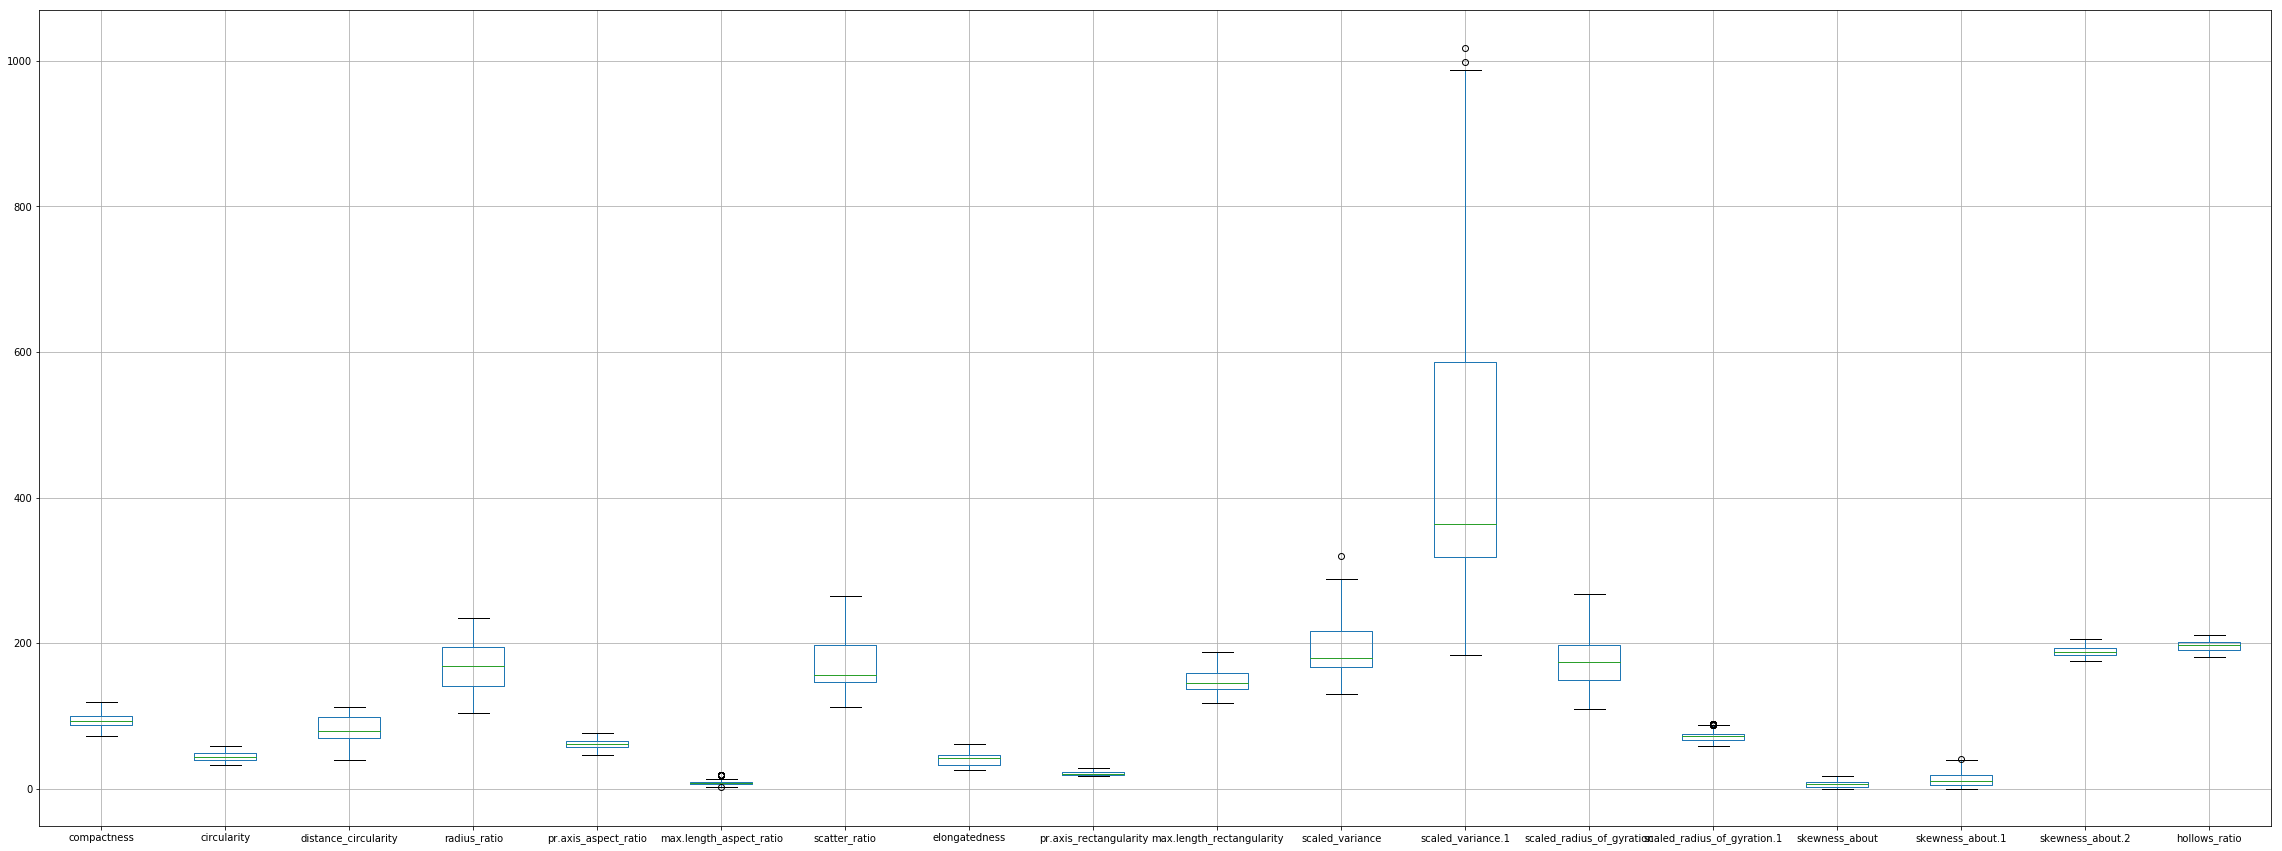

In [98]:
#Now we have done some tings to overcome the outliers, Lets see the box plot now,

data.boxplot(figsize=(40,15))


#The outliers has been handled to some extend.

### Bivariant Analysis

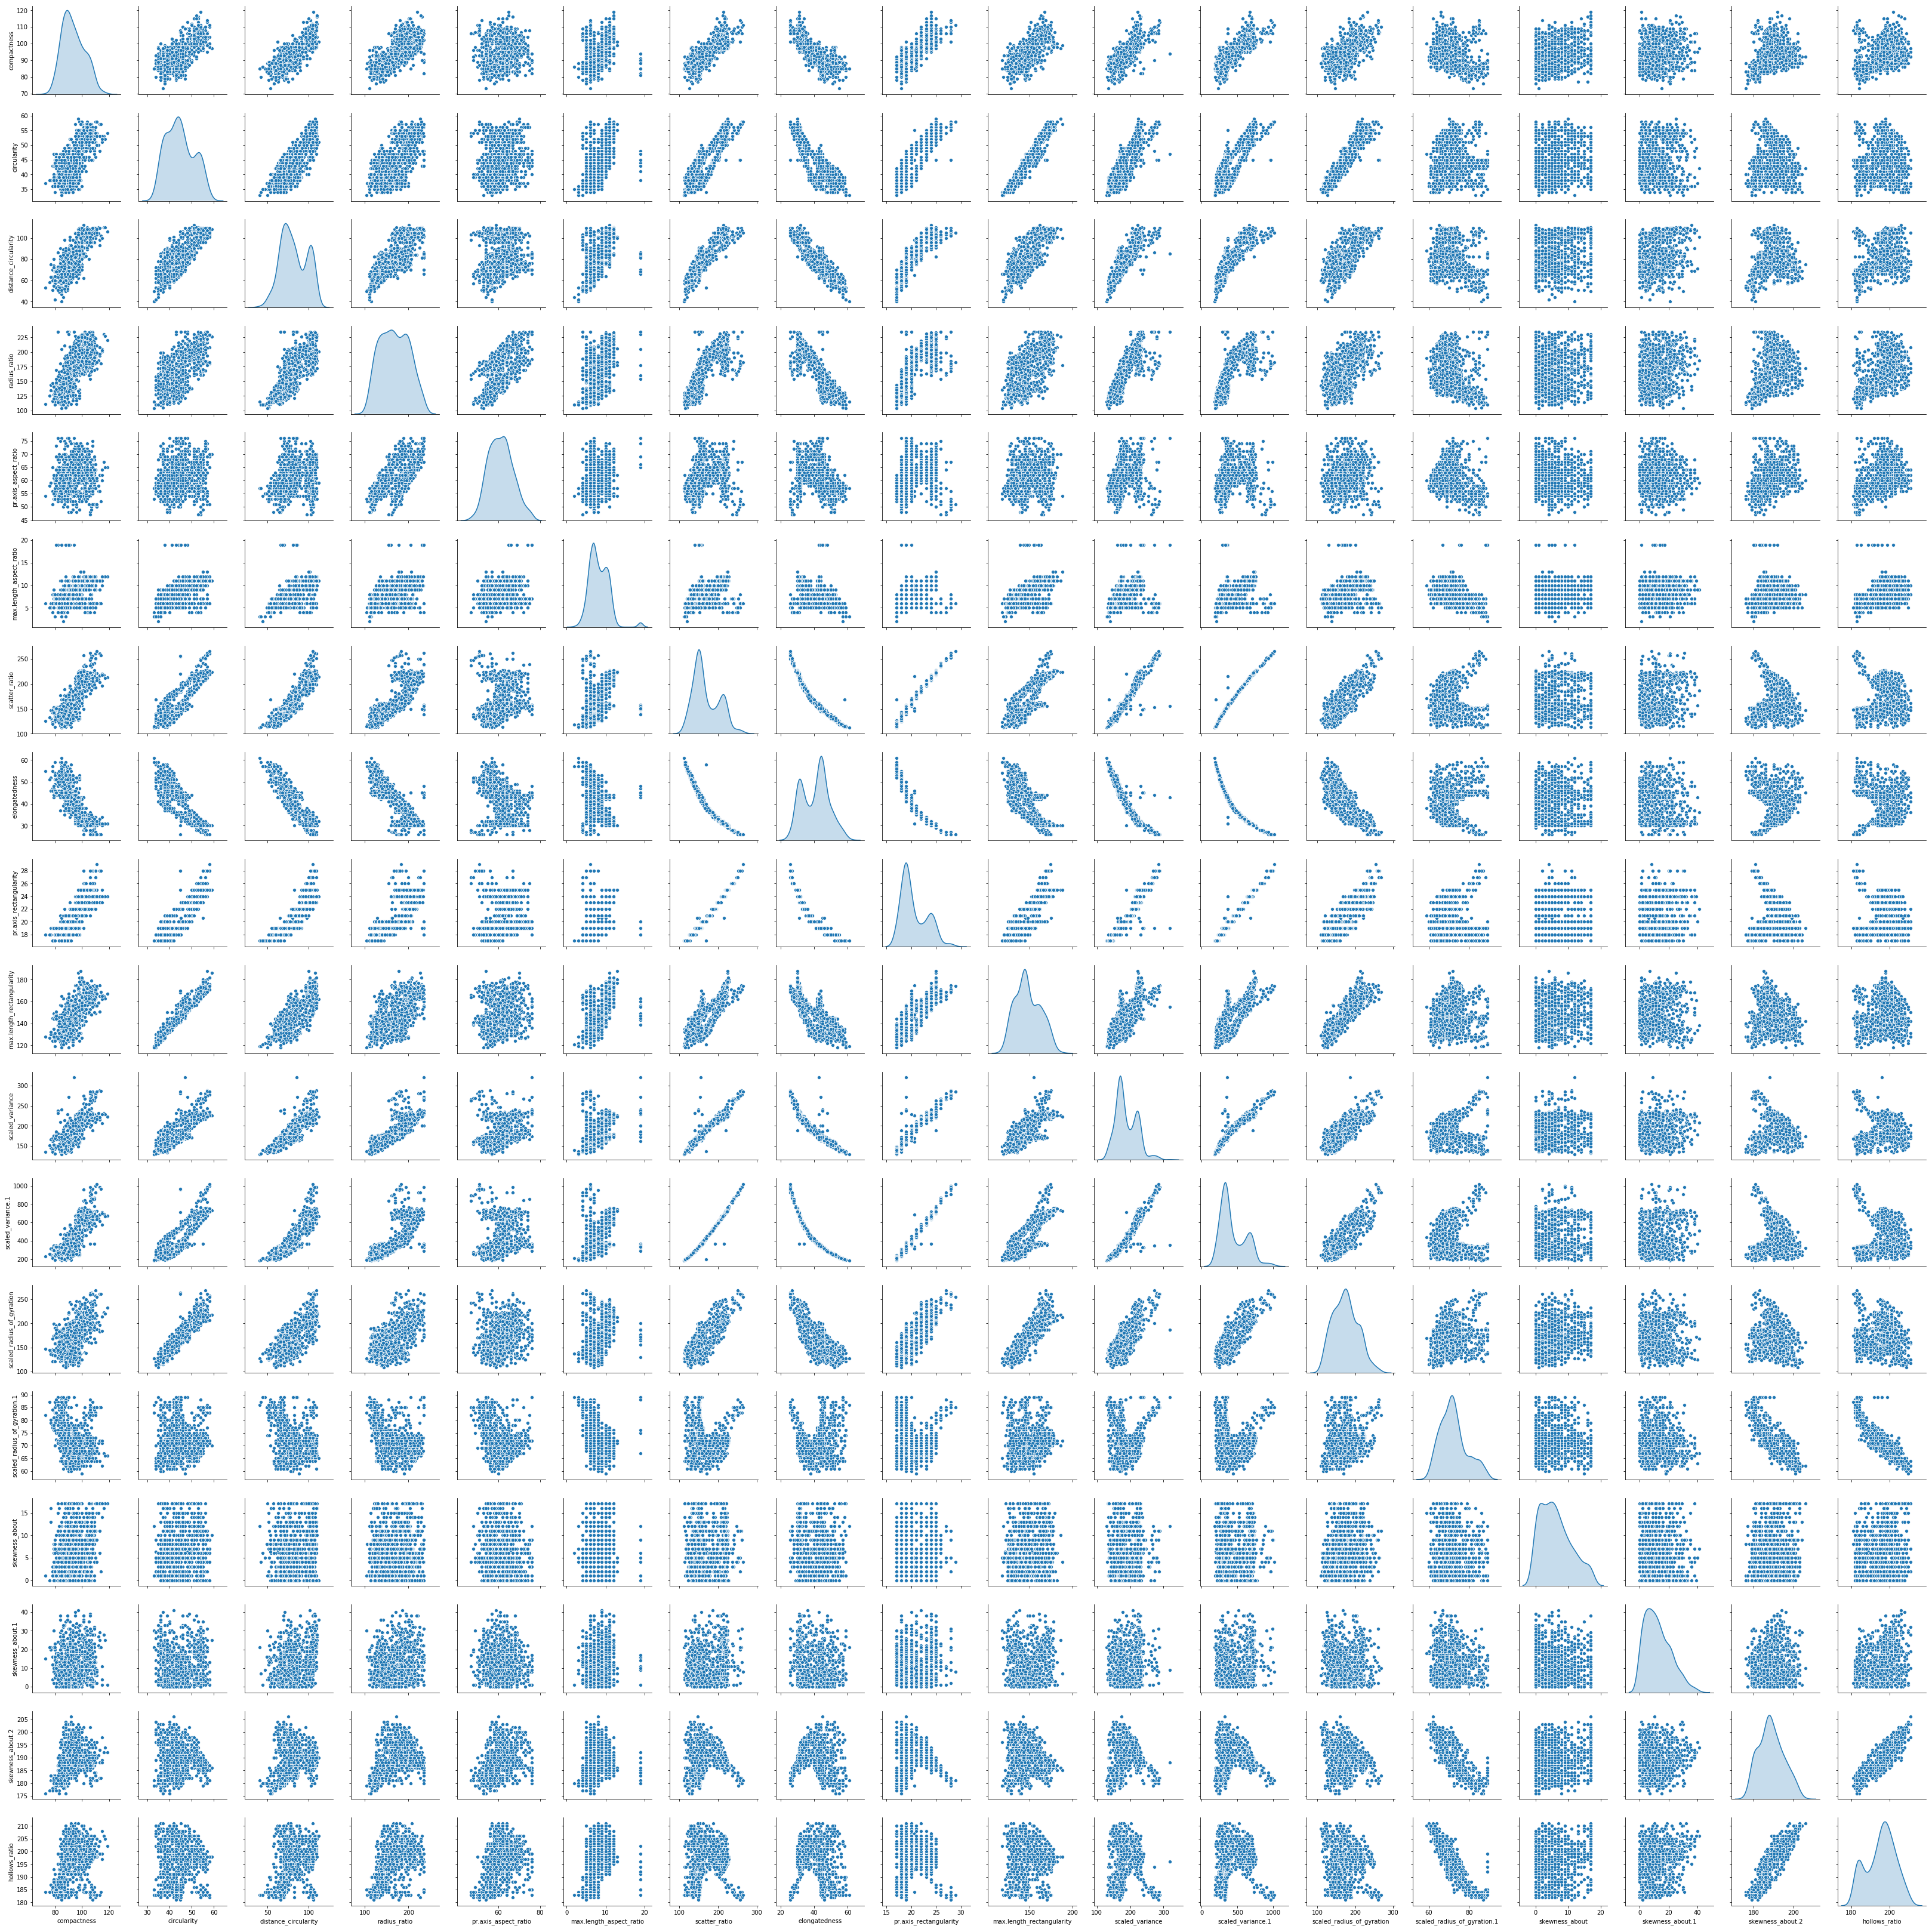

In [99]:
sns.pairplot(data,diag_kind='kde')

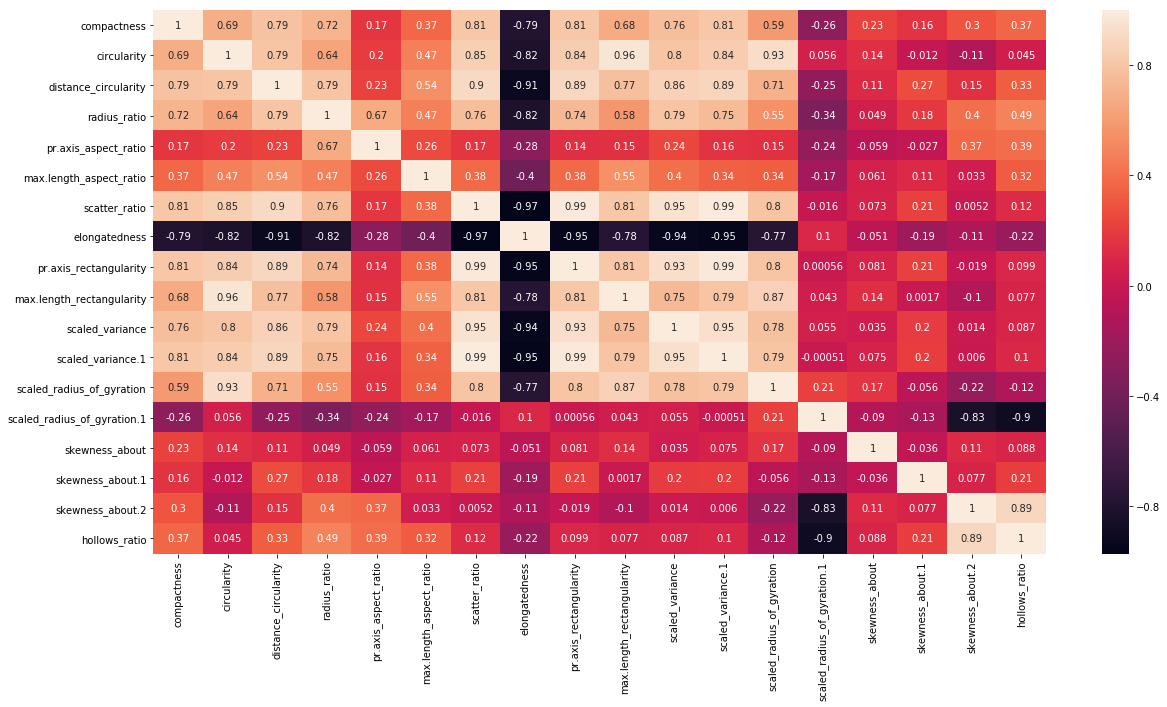

In [100]:
corr=data.corr()
plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
sns.heatmap(corr,annot=True)

## SVM Modelling - Without PCM

In [101]:
#Splitting of Independent and Dependent variables

y=data['class']
X=data.drop(columns='class')

In [102]:
#Standardization of Data

def standardization(X_train,X_test):
    scaler=preprocessing.StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    return X_train,X_test

In [103]:
#SVM

def svm_fun(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)
    X_train,X_test=standardization(X_train,X_test)
    
    clf = svm.SVC(gamma=0.025,C=3)
    #when C increases Marigin shrinks
    # gamma is a measure of influence of a data point. It is inverse of distance of influence. C is complexity of the model
    # lower C value creates simple hyper surface while higher C creates complex surface

    clf.fit(X_train,y_train)
    svm_pred=clf.predict(X_test)
    svm_score=clf.score(X_test,y_test)
    print("The KNN model prediction is " + str(svm_score*100) + "%")
    
    print("The confusion matrix is ")
    print(metrics.confusion_matrix(y_test,svm_pred))
    print("the Classification report is")
    print(metrics.classification_report(y_test,svm_pred))
    #roc=roc_auc_score(y_test, svm_pred)
    #print("ROC value for svm model is "+ str(roc*100) + "%")

In [104]:
#SVM

svm_fun(X,y)

The KNN model prediction is 96.8503937007874%
The confusion matrix is 
[[ 58   1   0]
 [  1 129   3]
 [  2   1  59]]
the Classification report is
              precision    recall  f1-score   support

         bus       0.95      0.98      0.97        59
         car       0.98      0.97      0.98       133
         van       0.95      0.95      0.95        62

   micro avg       0.97      0.97      0.97       254
   macro avg       0.96      0.97      0.97       254
weighted avg       0.97      0.97      0.97       254



## SVM Modelling - With PCM

In [105]:
#Splitting of Independent and Dependent variables

y_pcm=data['class']
X_pcm=data.drop(columns='class')

In [106]:
# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 

#Covariance is done only on Independent variables
sc = preprocessing.StandardScaler()
X_std =  sc.fit_transform(X_pcm)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343e+00  6.86232515e-01  7.90844121e-01  7.19486607e-01
   1.69249223e-01  3.75112934e-01  8.13196231e-01 -7.89575871e-01
   8.14598883e-01  6.76943342e-01  7.63672647e-01  8.14975660e-01
   5.85848651e-01 -2.65007546e-01  2.28037252e-01  1.57573159e-01
   2.98879698e-01  3.65984455e-01]
 [ 6.86232515e-01  1.00118343e+00  7.93953986e-01  6.39617688e-01
   1.98320397e-01  4.70814297e-01  8.49210579e-01 -8.22873474e-01
   8.45971641e-01  9.63080942e-01  7.97764504e-01  8.37974499e-01
   9.27985236e-01  5.57001522e-02  1.44409584e-01 -1.18652734e-02
  -1.05769799e-01  4.53716437e-02]
 [ 7.90844121e-01  7.93953986e-01  1.00118343e+00  7.94643227e-01
   2.30155096e-01  5.40884263e-01  9.05470613e-01 -9.12513680e-01
   8.94185135e-01  7.75586236e-01  8.63000311e-01  8.87088703e-01
   7.06788350e-01 -2.48315297e-01  1.10995350e-01  2.65867562e-01
   1.45734974e-01  3.32488398e-01]
 [ 7.19486607e-01  6.39617688e-01  7.94643227e-01  1.00118343e+00
   6.75408459e-

In [107]:
#The dimensions are rotated

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-2.73062440e-01 -9.40568902e-02 -7.10071869e-02  2.07657112e-01
   1.27667189e-01  7.16059806e-02  3.22979382e-01  7.01126279e-01
  -3.76976126e-01 -2.72322082e-01 -5.23164950e-02  7.09257830e-02
   1.31556754e-01 -1.10566177e-02  5.18610885e-02 -8.25829065e-02
  -1.10706613e-02 -2.71010754e-03]
 [-2.89221228e-01  1.29789421e-01  1.95220869e-01  5.78945487e-02
  -7.02771479e-02  1.00857154e-01 -3.96169853e-01  1.20024075e-01
  -1.68236068e-02  6.01059106e-02  1.89813253e-04 -2.72320152e-01
  -5.08902076e-03 -5.34338818e-03  2.41683420e-01  1.16769072e-01
  -7.16678872e-01  8.82748206e-02]
 [-3.02882713e-01 -5.17448623e-02 -1.01442970e-01  3.03896999e-02
  -1.00064881e-01  6.27445098e-02  4.56330691e-02 -3.61624151e-01
  -2.56764053e-01 -1.41312698e-01 -7.63794554e-01  7.74528568e-02
  -9.02263456e-02  1.14352379e-02 -1.83446633e-01  1.66907769e-01
  -4.97322523e-02 -5.67582038e-03]
 [-2.72050113e-01 -2.00697297e-01  9.22357860e-02 -2.33514525e-01
   8.56490857e-02 -

In [108]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

#Desc sort
eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.642811747181636, array([-0.27306244, -0.28922123, -0.30288271, -0.27205011, -0.09721494,
       -0.16590345, -0.31205234,  0.31034288, -0.30899847, -0.27953571,
       -0.30201495, -0.30850239, -0.2659863 ,  0.03997778, -0.0403057 ,
       -0.05858685, -0.03588886, -0.08170543])), (3.2928720016853212, array([-0.09405689,  0.12978942, -0.05174486, -0.2006973 , -0.24548013,
       -0.08425488,  0.06961541, -0.00674739,  0.08230482,  0.12000875,
        0.07164051,  0.07660433,  0.20904643,  0.49799879, -0.03438621,
       -0.09939021, -0.50995959, -0.51390688])), (1.2022205017821275, array([-0.07100719,  0.19522087, -0.10144297,  0.09223579,  0.39560961,
        0.2051652 , -0.12766407,  0.07661047, -0.1368    ,  0.19055541,
       -0.0945556 , -0.13450364,  0.20129439,  0.02842765,  0.21647713,
       -0.73931451,  0.02108098,  0.00195331])), (1.162852366184379, array([ 0.20765711,  0.05789455,  0.0303897 , -0.23351452, -0.50362844,
       -0.08193694, -0.00247078,  0.05641834,  0.0

In [109]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

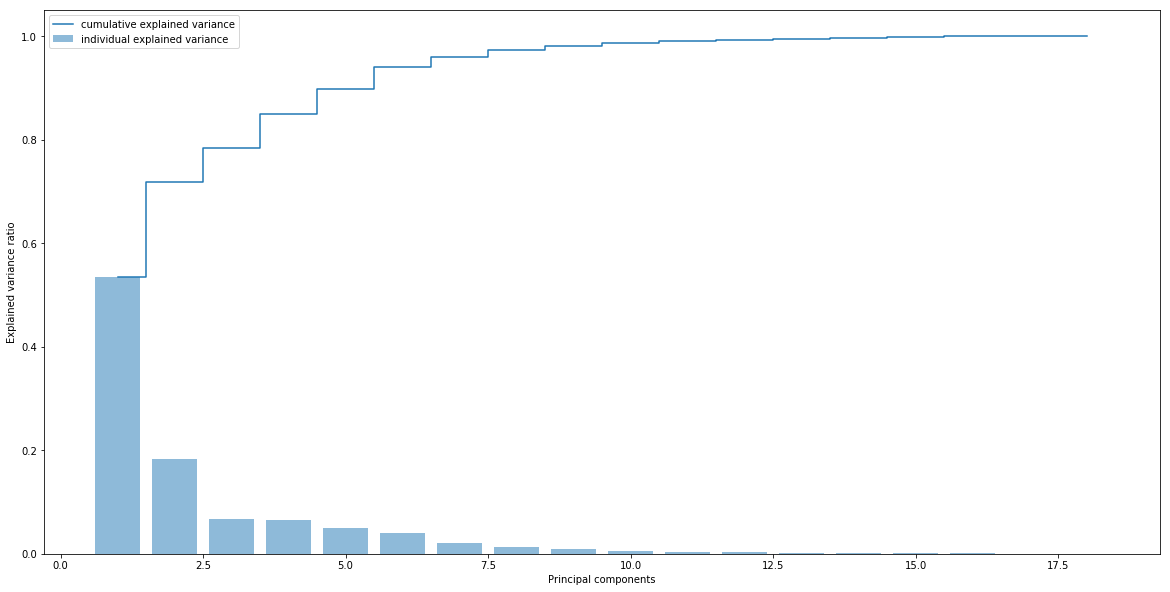

In [110]:
#1,19 depends on covariance matrix - count

plt.figure(figsize=(20,10))
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [111]:
# P_reduce represents reduced mathematical space....

#From the above graph we see that 10 to 16 would be good.So lets try with that
#After trying with the above range we see that 13 would be perfect,

P_reduce = np.array(eigvectors_sorted[0:13])   # Reducing from 18 to 13 dimension space

X_std_13D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_13D)  # converting array to dataframe for pairplot

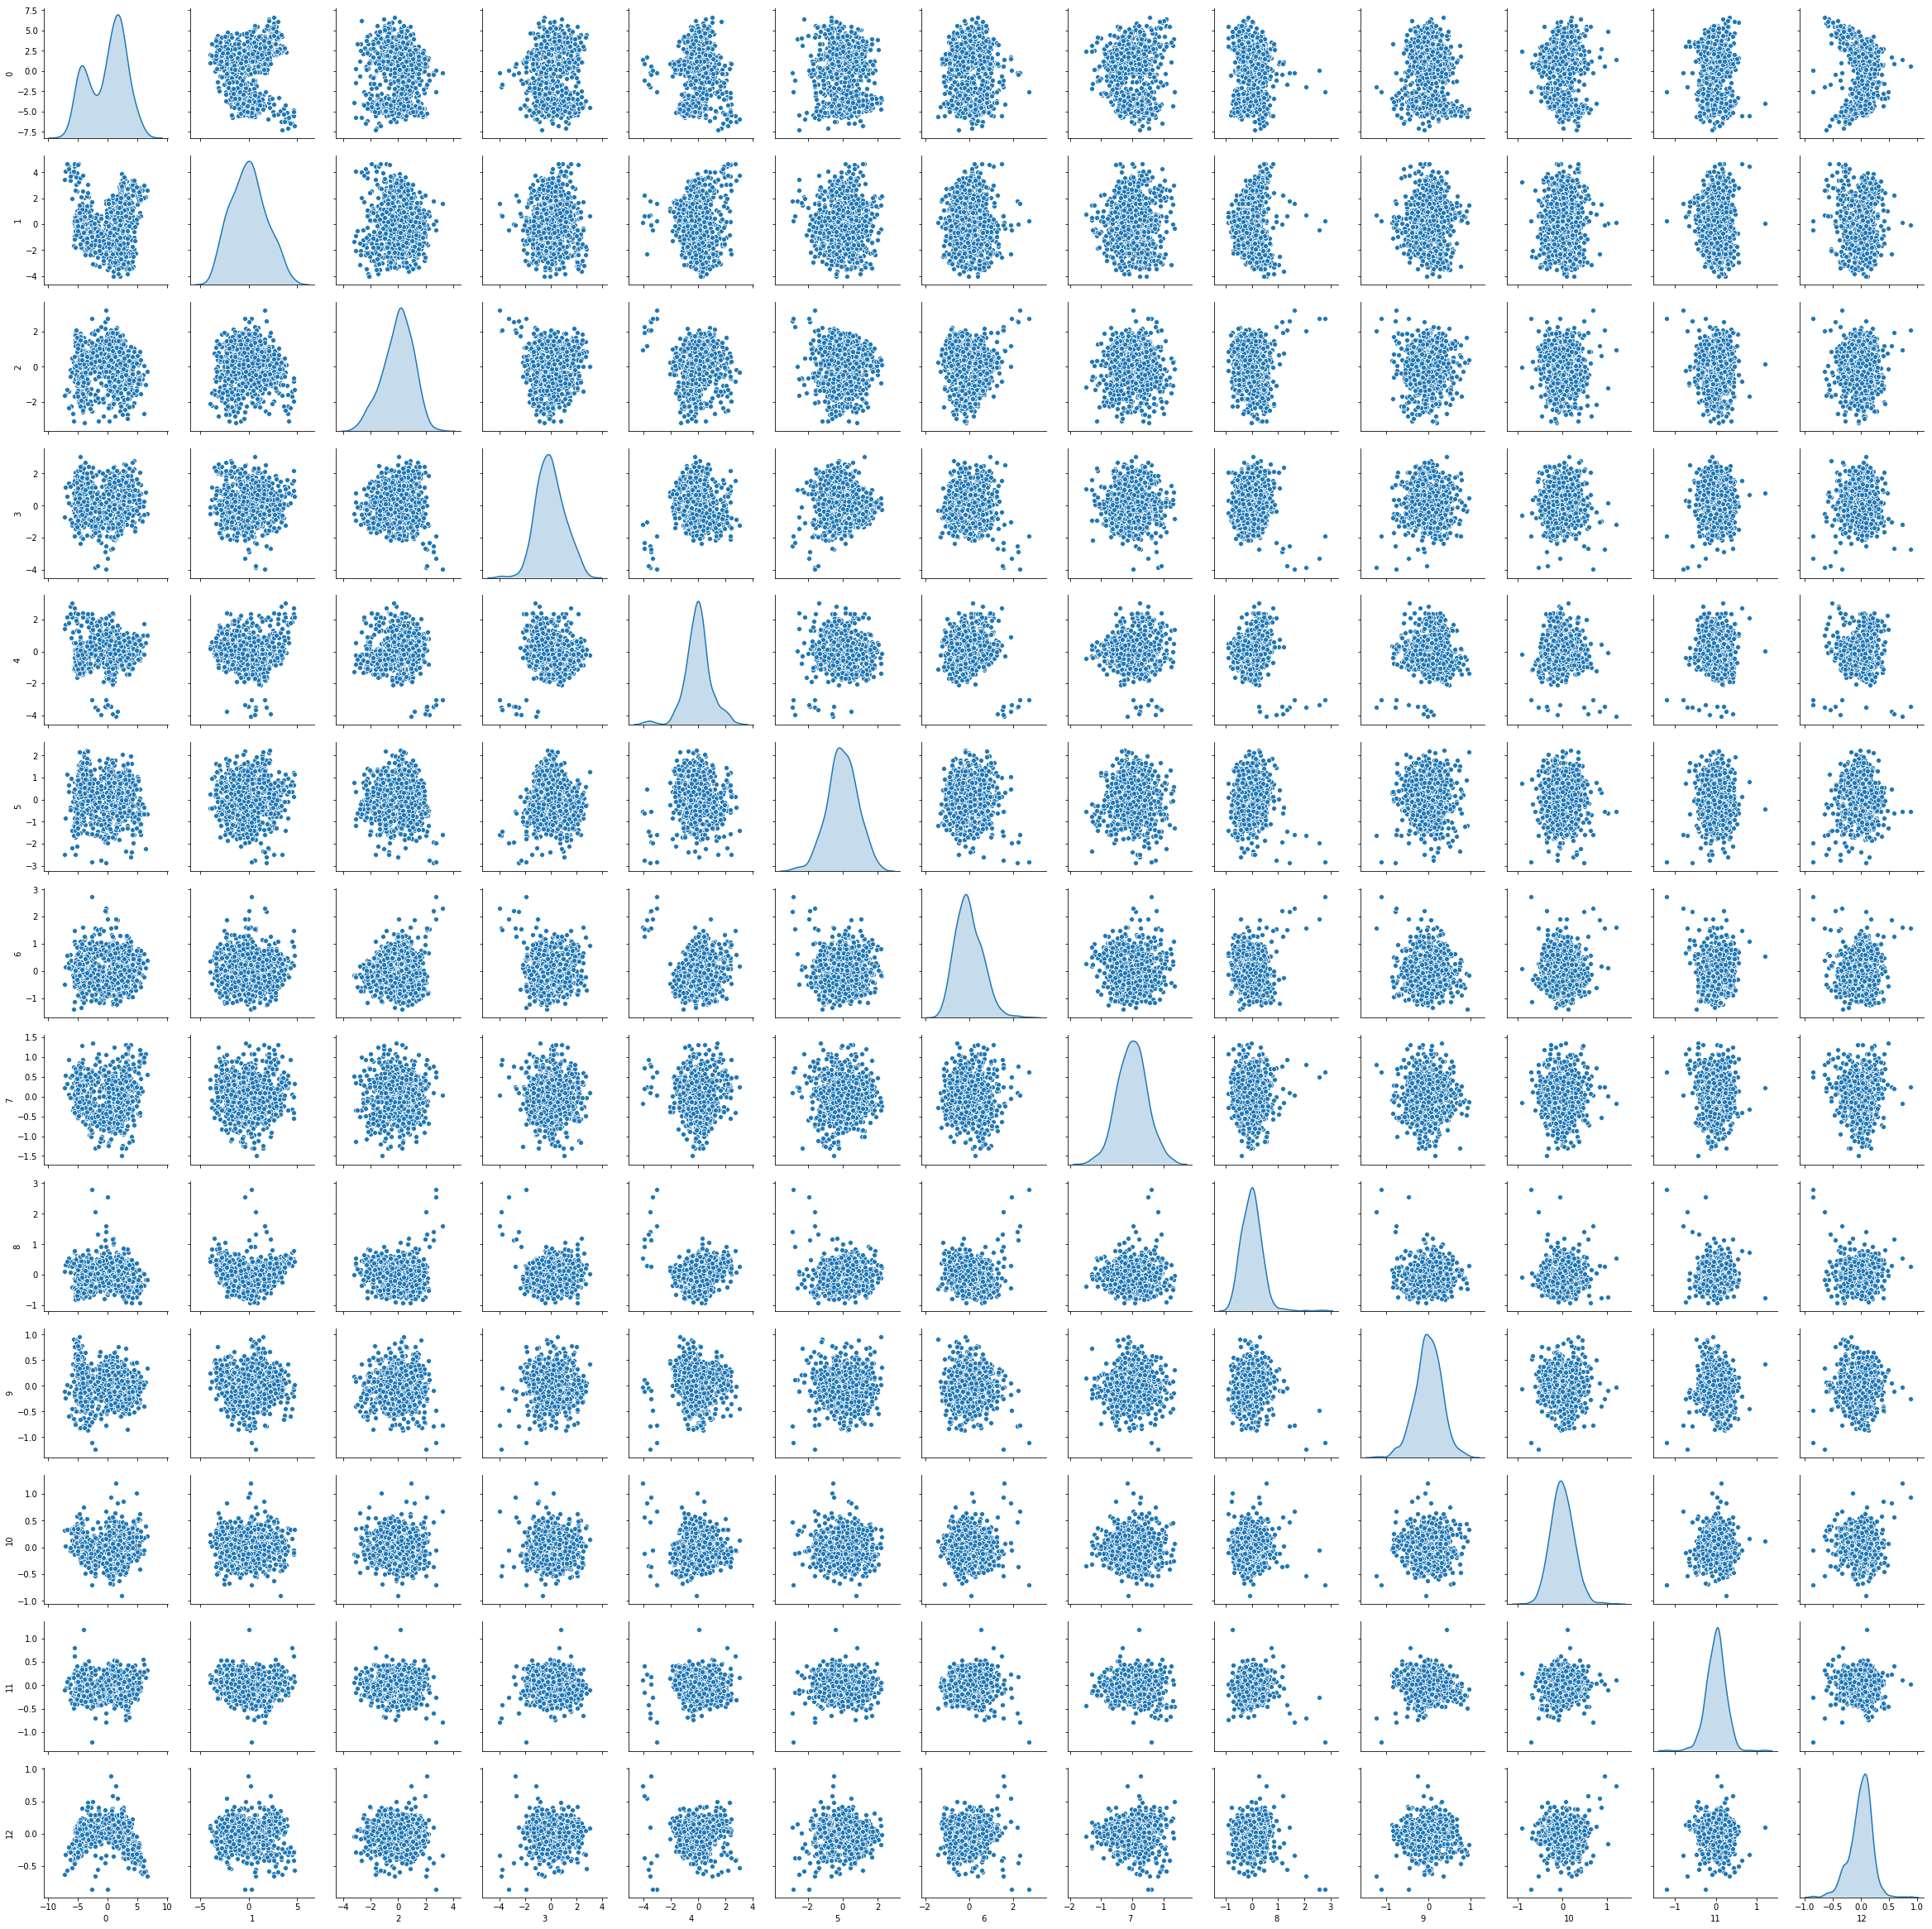

In [112]:
#Let us check it visually

sns.pairplot(Proj_data_df, diag_kind='kde') 

In [113]:
#Calling SVM function using PCM data

svm_fun(Proj_data_df, y_pcm)

The KNN model prediction is 98.03149606299213%
The confusion matrix is 
[[ 58   1   0]
 [  1 130   2]
 [  1   0  61]]
the Classification report is
              precision    recall  f1-score   support

         bus       0.97      0.98      0.97        59
         car       0.99      0.98      0.98       133
         van       0.97      0.98      0.98        62

   micro avg       0.98      0.98      0.98       254
   macro avg       0.98      0.98      0.98       254
weighted avg       0.98      0.98      0.98       254



## Inferences:

### Hyper Parameter tuning and Randomized Search 

In [114]:
  #RandomizedSearchCV - SVM
#Implement Hyperparameter

def hyper_params_svm(X,y):
#gamma is a parameter for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set
    gammas = [0.1, 1, 10, 100]
#kernel parameters selects the type of hyperplane used to separate the data. Using ‘linear’ will use a linear hyperplane 
        #(a line in the case of 2D data). ‘rbf’ and ‘poly’ uses a non linear hyper-plane
    kernels  = ['linear', 'rbf', 'poly']
#C is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.
    cs = [0.1, 1, 10, 100, 1000]
#degree is a parameter used when kernel is set to ‘poly’. It’s basically the degree of the polynomial used to find the hyperplane to split the data.
    degrees = [0, 1, 2, 3, 4, 5, 6]

# Create the random grid
    random_grid = {'gamma': gammas,
                   'kernel': kernels,
                   'C': cs,
                   'degree': degrees}

    pprint(random_grid)
    return random_grid

def randomizedsearch_svm(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)
    X_train,X_test=standardization(X_train,X_test)
# Use the random grid to search for best hyperparameters
# First create the base model to tune
    svm_obj = svm.SVC(random_state=1)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = svm_obj, param_distributions = hyper_params_svm(X,y), n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    rf_random.fit(X_train, y_train)
    print("Best Hyper Parameters:",rf_random.best_params_)
    
    pred=rf_random.predict(X_test)
    score=rf_random.score(X_test,y_test)
    print("The model prediction is " + str(score*100) + "%")
    print("The confusion matrix is ")
    print(metrics.confusion_matrix(y_test, pred))
    print("the Classification report is")
    print(metrics.classification_report(y_test, pred))

In [115]:
#Calling Randmized search for SVM

randomizedsearch_svm(Proj_data_df, y_pcm)

{'C': [0.1, 1, 10, 100, 1000],
 'degree': [0, 1, 2, 3, 4, 5, 6],
 'gamma': [0.1, 1, 10, 100],
 'kernel': ['linear', 'rbf', 'poly']}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   12.8s


Best Hyper Parameters: {'kernel': 'rbf', 'gamma': 0.1, 'degree': 5, 'C': 1}
The model prediction is 96.06299212598425%
The confusion matrix is 
[[ 58   1   0]
 [  0 130   3]
 [  1   5  56]]
the Classification report is
              precision    recall  f1-score   support

         bus       0.98      0.98      0.98        59
         car       0.96      0.98      0.97       133
         van       0.95      0.90      0.93        62

   micro avg       0.96      0.96      0.96       254
   macro avg       0.96      0.95      0.96       254
weighted avg       0.96      0.96      0.96       254



[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.5min finished
